In [1]:
import pandas as pd
import cPickle as pkl
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
pd.options.display.max_rows = 100

Protein synthesis rate per cell (not per transcript):

In [3]:
all_time_tes_annotated = pkl.load(open("../../parameters/all_time_tes_annotated.df"))
len(all_time_tes_annotated)

3727

We want to calculate a table of $\mu$ and $\sigma$ per functional category and time.

How many genes a functional group should have at minimum:

In [4]:
min_genes = 35

In [5]:
all_time_tes_annotated.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YBR177C,0.128333,0.133333,NaN,0.043333,0.055833,0.034167,0.031000,0.037500,0.091667,0.077500,0.123333,0.065000,
YIL140W,0.098333,0.100000,0.040833,0.048333,0.048333,0.031667,NaN,NaN,0.078333,NaN,NaN,NaN,
YLR268W,0.135000,0.110000,0.060333,0.054048,0.055333,0.036458,0.036970,0.034167,0.088333,0.080556,0.120000,0.072222,SNARE interactions in vesicular transport
YJL155C,0.115000,NaN,0.038333,0.053333,0.043333,0.035000,0.025833,0.020000,0.078333,0.080000,0.100000,0.075000,Carbohydrate metabolism
YLR197W,0.143333,0.145000,0.071322,0.069624,0.075333,0.048251,0.048145,0.050645,0.105000,0.108512,0.139792,0.102849,Ribosome biogenesis in eukaryotes


In [6]:
functional_counts = all_time_tes_annotated.Function.value_counts(dropna=False)

We keep only functional groups with at least `min_genes` genes to calculate a better $\mu$ and $\sigma$.
We drop the unlabelled ones.

In [8]:
functional_counts[functional_counts >= min_genes].index.drop(u'')

Index([u'Other enzymes', u'Amino acid metabolism', u'Chromosome-related',
       u'Ribosome', u'Cofactor biosynthesis', u'Lipid and steroid metabolism',
       u'Chaperones and folding catalysts',
       u'Ribosome biogenesis in eukaryotes', u'Glycolysis', u'Spliceosome',
       u'Glycan metabolism', u'Protein processing in endoplasmic reticulum',
       u'Translation factors', u'Oxidative phosphorylation', u'RNA transport',
       u'RNA degradation', u'tRNA loading'],
      dtype='object')

In [9]:
functional_counts.head()

                         1859
Other enzymes             122
Amino acid metabolism     116
Chromosome-related        112
Ribosome                  110
Name: Function, dtype: int64

In [10]:
all_time_tes_annotated_selected = all_time_tes_annotated[all_time_tes_annotated
                                                         .Function.isin(functional_counts[functional_counts >= 
                                                                                          min_genes].index.drop(u''))]
len(all_time_tes_annotated_selected)

1118

In [11]:
all_time_tes_annotated_selected.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YLR197W,0.143333,0.145000,0.071322,0.069624,0.075333,0.048251,0.048145,0.050645,0.105000,0.108512,0.139792,0.102849,Ribosome biogenesis in eukaryotes
YGR148C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Ribosome
YPL040C,NaN,NaN,0.010000,0.013333,0.017500,NaN,0.010000,0.003333,NaN,NaN,NaN,0.025000,tRNA loading
YBR111W-A,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Chromosome-related
YHR007C,0.149444,0.138889,0.068333,0.068167,0.074417,0.046286,0.046468,0.048476,0.107273,0.103485,0.142222,0.101410,Lipid and steroid metabolism


Average translational efficiency by function:

In [12]:
means = all_time_tes_annotated_selected.groupby(['Function'], as_index=False).mean()
means.set_index('Function', inplace=True)

Display in color:

In [13]:
#cm = sns.light_palette("blue", as_cmap=True)
cm = sns.diverging_palette(240, 10, n=9, as_cmap=True)

means.round(decimals=3).style.background_gradient(cmap=cm)

In [14]:
print(means.round(decimals=3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   0    &   300  &   600  &   900  &   1200 &   1500 &   1800 &   2100 &   2400 &   2700 &   3000 &   3300 \\
Function                                    &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
Amino acid metabolism                       &  0.127 &  0.127 &  0.059 &  0.061 &  0.064 &  0.041 &  0.041 &  0.042 &  0.092 &  0.095 &  0.122 &  0.087 \\
Chaperones and folding catalysts            &  0.120 &  0.121 &  0.063 &  0.065 &  0.068 &  0.044 &  0.044 &  0.045 &  0.095 &  0.094 &  0.118 &  0.089 \\
Chromosome-related                          &  0.085 &  0.087 &  0.038 &  0.040 &  0.040 &  0.025 &  0.025 &  0.027 &  0.062 &  0.062 &  0.083 &  0.058 \\
Cofactor biosynthesis                       &  0.098 &  0.098 &  0.046 &  0.048 &  0.047 &  0.030 &  0.031 &  0.031 &  0.072 &  0.070 &  0.099 &  0.068 \\
Glycan metabolism                           &  0.085 &  0.084 

Strangely `std()` does not work.

Show only ranks of means to reduce the noise and effect of different scales:

In [20]:
ranks = means.rank(ascending=False)
ranks

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
Function,,,,,,,,,,,,
Amino acid metabolism,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,4.0,5.0,5.0
Chaperones and folding catalysts,6.0,6.0,3.0,4.0,3.0,4.0,4.0,5.0,4.0,5.0,6.0,4.0
Chromosome-related,16.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,17.0
Cofactor biosynthesis,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
Glycan metabolism,17.0,17.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,16.0
Glycolysis,3.0,4.0,4.0,3.0,4.0,5.0,5.0,3.0,3.0,3.0,4.0,3.0
Lipid and steroid metabolism,8.0,8.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0
Other enzymes,10.0,10.0,11.0,12.0,12.0,11.0,11.0,13.0,11.0,11.0,12.0,11.0
Oxidative phosphorylation,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0


In [21]:
ranks[3300]

Function
Amino acid metabolism                           5.0
Chaperones and folding catalysts                4.0
Chromosome-related                             17.0
Cofactor biosynthesis                          14.0
Glycan metabolism                              16.0
Glycolysis                                      3.0
Lipid and steroid metabolism                    9.0
Other enzymes                                  11.0
Oxidative phosphorylation                       1.0
Protein processing in endoplasmic reticulum    12.0
RNA degradation                                10.0
RNA transport                                  15.0
Ribosome                                        6.0
Ribosome biogenesis in eukaryotes               8.0
Spliceosome                                    13.0
Translation factors                             2.0
tRNA loading                                    7.0
Name: 3300, dtype: float64

In [22]:
#anks.sort_index(axis='3300')
ranks.sort([3300]).index

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


Index([u'Oxidative phosphorylation', u'Translation factors', u'Glycolysis',
       u'Chaperones and folding catalysts', u'Amino acid metabolism',
       u'Ribosome', u'tRNA loading', u'Ribosome biogenesis in eukaryotes',
       u'Lipid and steroid metabolism', u'RNA degradation', u'Other enzymes',
       u'Protein processing in endoplasmic reticulum', u'Spliceosome',
       u'Cofactor biosynthesis', u'RNA transport', u'Glycan metabolism',
       u'Chromosome-related'],
      dtype='object', name=u'Function')

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


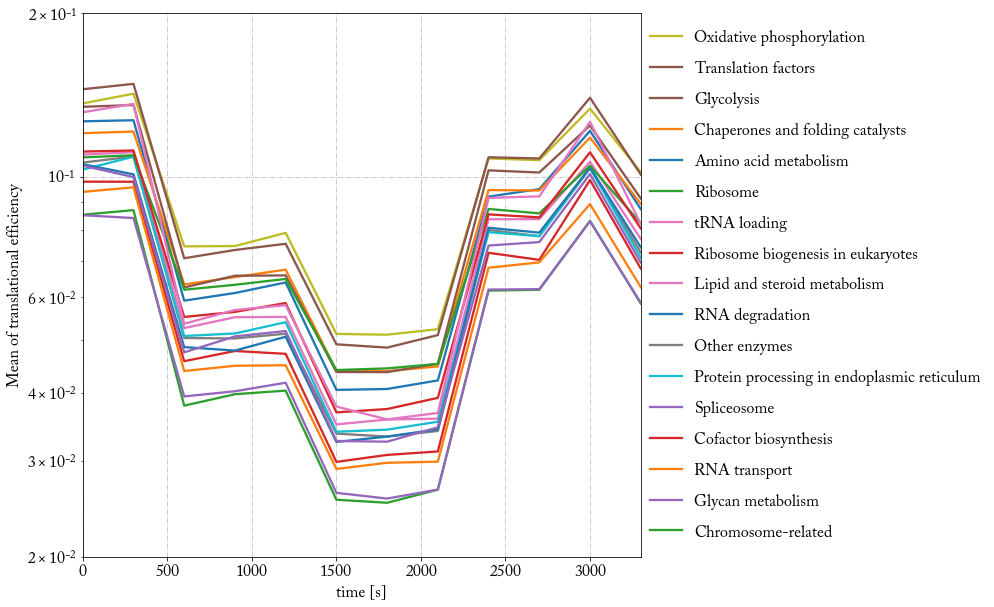

In [23]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = means.transpose().plot(linewidth=2.3)
ax.set_yscale('log')
ax.set_ylim([0.2, 0.02])

plt.xlabel('time [s]')
plt.ylabel('Mean of translational efficiency')
plt.gca().invert_yaxis()
#plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


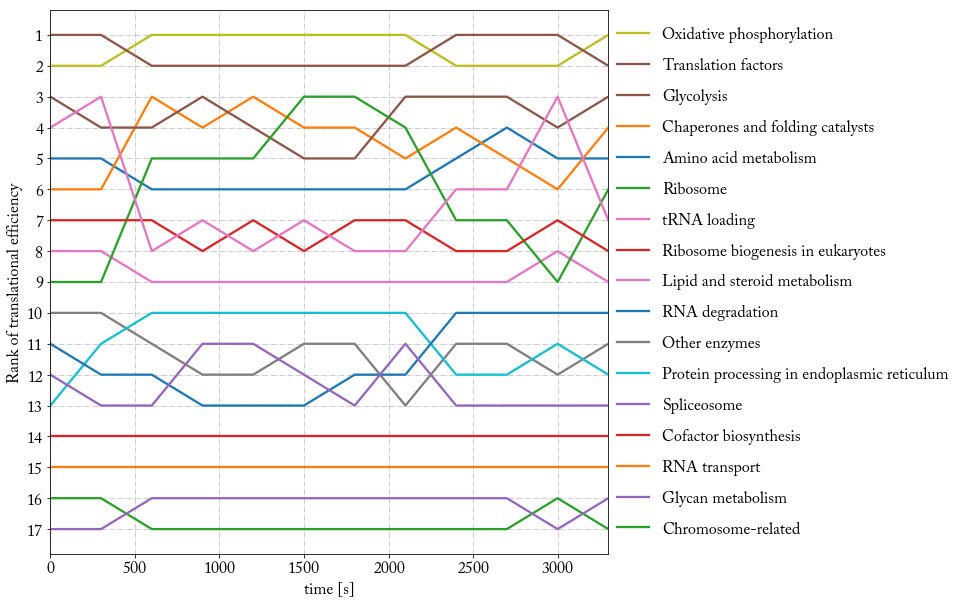

In [24]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3)

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

Same with Computer Modern:

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


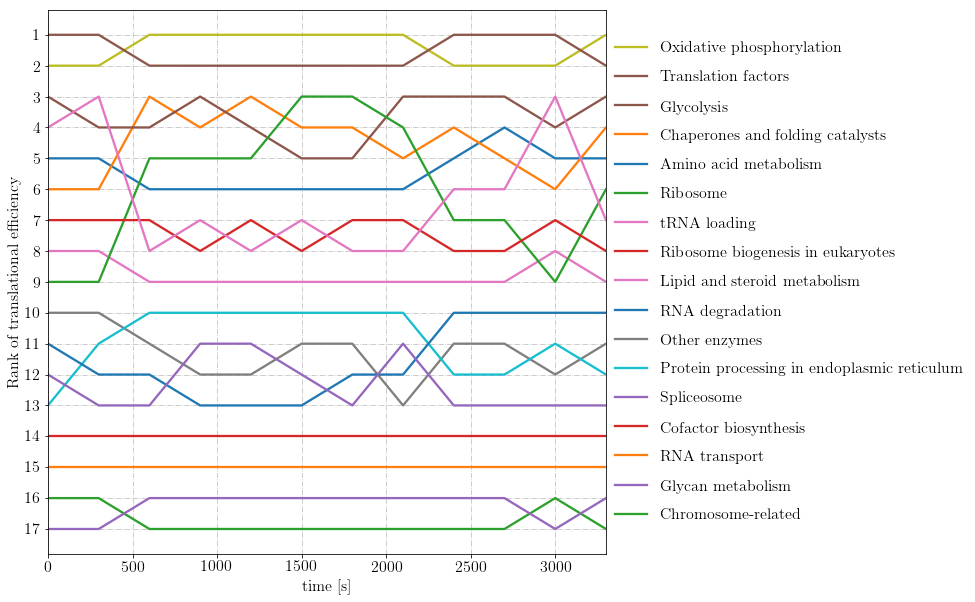

In [25]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
#matplotlib.rc('font', **font)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3)

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pdf", bbox_inches='tight')
#plt.show()

TODO: look at Kendall's $\tau$ as per

https://stats.stackexchange.com/questions/29560/can-i-compare-ordinal-rankings-and-if-so-how